In [3]:
import os
os.chdir('..')

In [4]:
import pysindy as ps
import numpy as np
import matplotlib.pyplot as plt

import Yukawa_SINDy as ys
import cross_validation as cv

from importlib import reload
import pickle as pkl
with open('scaling_const.float', 'rb') as f:
    SCALING_CONST = pkl.load(f)

In [5]:
scatter_kwargs = {}
scatter_kwargs["facecolors"] = 'none'
scatter_kwargs["edgecolors"] = 'tab:blue' 

# Investigation of noise robustness of the Weak SINDy method with cross-validation

In [13]:
def generate_directory_name(noise_level):
    noise_level_directory_name = f'noise_{noise_level:.3f}'.replace(".", "_")
    data_directory = 'paper_results/weak_noise_robustness/' + noise_level_directory_name# + '_smaller_range2'
    return data_directory


def load_in_data(data_directory):
    file_names = [
        'best_coefs.pickle',
        'best_model_prediction_errors.pickle',
        'truest_coefs.pickle',
        'truest_model_prediction_errors.pickle',
        'thresholds.pickle'
    ]
    data_lists = len(file_names)*[[]]
    for i, file_name in enumerate(file_names):
        data_lists[i] = ys.unpickle_data(data_directory, file_name)
    return data_lists


def print_multiple_models(coefficients, coefficient_deviations, thresholds):
    for i, learned_coefs in enumerate(coefficients):
        print()
        print(f'threshold = {thresholds[i]:.2f}')
        ys.print_from_coefs(learned_coefs, normalize=True)
        print(f'score: {coefficient_deviations[i]:.3f}')
        print(60*'-')


def plot_threshold_scan(coefficients, thresholds, noise_level):
    # compute devs
    coef_devs = cv.compute_coef_devs(coefficients)

    # compute complexities
    complexities = [np.count_nonzero(C) for C in coefficients]
    
    fig, ax = plt.subplots()
    x = thresholds
    y = coef_devs
    ax.scatter(x, y, s=200, facecolors='none', edgecolors='k')
    ax.set_title(f"Noise level = {noise_level}")
    ax.set_ylabel("Coefficient Deviation")
    ax.set_xlabel("Threshold")
    ticks = ax.get_xticks()
    pad = 0.02 * ticks.max()
    for i, txt in enumerate(complexities):
        ax.annotate(txt, (x[i], y[i]), (x[i]+pad, y[i]), fontsize=10)
    fig.tight_layout()
    return fig, ax


def show_threshold_scans(noise_space):
    if not isinstance(noise_space, np.ndarray):
        noise_space = np.array(noise_space)
    n_plots = noise_space.shape[0]
    n_cols = 2
    n_rows = int(np.ceil(n_plots / n_cols))
    while noise_space.shape[0] % n_cols != 0:
        noise_space = np.hstack((noise_space, None))
    noise_space = noise_space.reshape((n_rows, n_cols))

    fig, axs = plt.subplots(n_rows, n_cols, sharex=True, sharey=True)#, figsize = (15,10))
    if axs.ndim == 1:
        axs = axs.reshape((1,n_cols))
        
    for row in range(n_rows):
        for col in range(n_cols):
            # load in data
            noise = noise_space[row, col]
            data_directory = generate_directory_name(noise)
            data_lists = load_in_data(data_directory)
            thresholds = data_lists[4]
            truest_coefs = data_lists[2]

            # calc complexities & deviation for truest model
            coef_dev = cv.compute_coef_devs(truest_coefs)
            complexities = [np.count_nonzero(C) for C in truest_coefs]

            # plot truest coef threshold scan for different noises
            ax = axs[row, col]
            ax.set_title(f"Noise level = {noise}")
            x = thresholds
            y = coef_dev
            ax.scatter(x, y, s=100, facecolors='none', edgecolors='tab:blue')

            # label the points with the complexities
            xticks = ax.get_xticks()
            xpad = 0.02 * (xticks.max() - xticks.min())
            yticks = ax.get_yticks()
            ypad = 0.02 * (yticks.max() - yticks.min())
            for i, txt in enumerate(complexities):
                ax.annotate(txt, (x[i], y[i]), (x[i]+xpad, y[i]-ypad), fontsize=10)
    fig.supylabel("$\Delta c$")
    fig.supxlabel("Threshold")
    fig.tight_layout()

    return fig, axs

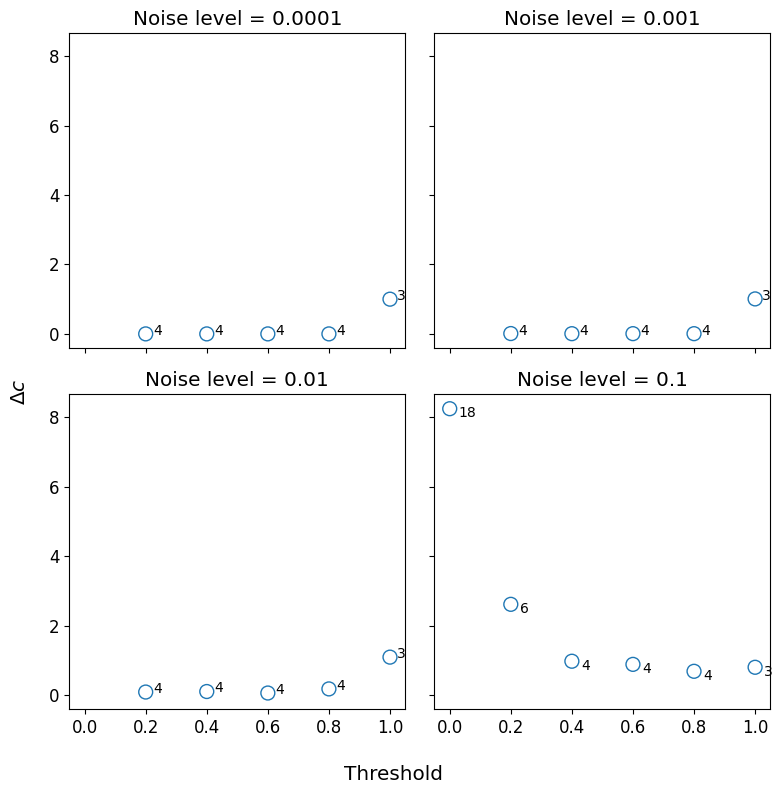

In [14]:
# change plot parameters
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (8,8)

noise_space = np.logspace(-4, -1, 4)
fig, axs = show_threshold_scans(noise_space)

In [299]:
noise_level = 1e-4
data_directory = generate_directory_name(noise_level)
data_lists = load_in_data(data_directory)
truest_coefficients = data_lists[2]
model_idx = 1
print(f'Threshold = {data_lists[-1][model_idx]:.2f}')
ys.print_from_coefs(truest_coefficients[model_idx], normalize=True)

Threshold = 0.40
(x0)' = 0.99999 x1
(x1)' = 0.99997 A exp(-x0) / x0 + 0.99997 A exp(-x0) / x0^2 + 0.00009 A exp(-x0) / x0^3


In [262]:
np.linspace(0.01, 0.04, 4)

array([0.01, 0.02, 0.03, 0.04])

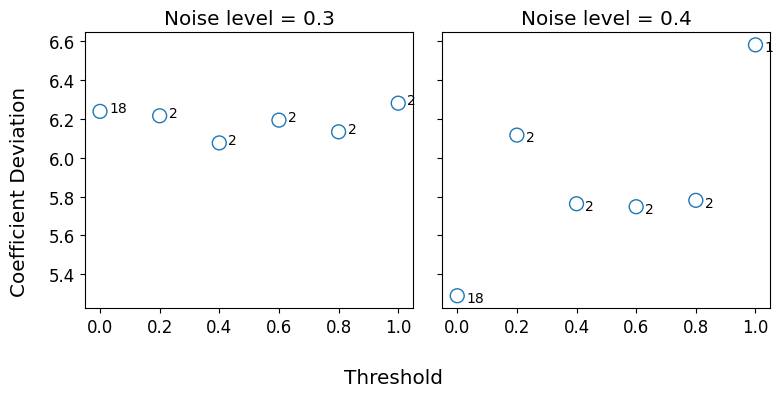

In [350]:
plt.rcParams["figure.figsize"] = (8,4)
noise_space = [0.3,0.4]
fig, axs = show_threshold_scans(noise_space)

In [271]:
data_directory = 'paper_results/weak_noise_robustness/noise_0_300'
lists = load_in_data(data_directory)
ys.print_from_coefs(lists[2][1], normalize=True)

(x0)' = 0.98300 x1
(x1)' = 1.36413 A exp(-x0) / x0


In [266]:
data_directory

'paper_results/weak_noise_robustness/noise_0_300_smaller_range2'

In [17]:
directory_name = 'paper_results/weak_noise_robustness/noise_scan/'
list_of_data = []
file_names = [
    'noises.pickle',
    'thresholds.pickle',
    'truest_coefs.pickle',
    'truest_prediction_errors.pickle'
]
for file_name in file_names:
    data = ys.unpickle_data(directory_name, file_name)
    list_of_data.append(data)

In [18]:
# unpack to readable variables
noises = list_of_data[0]
thresholds = list_of_data[1]
truest_coefs = list_of_data[2]
truest_scores = list_of_data[3]

In [359]:
0.4/SCALING_CONST

0.08801000905846945

In [358]:
ys.print_from_coefs(truest_coefs[-4], normalize=True)

(x0)' = 0.99819 x1
(x1)' = 0.94878 A exp(-x0) / x0 + 0.94317 A exp(-x0) / x0^2 + 0.07319 A exp(-x0) / x0^3


In [24]:
def plot_noise_scan(coefficients, noise_levels):
    # extract complexities and coefficient deviations
    coef_devs = cv.compute_coef_devs(coefficients)

    # plot coef deviations vs. noise levels
    fig, ax = plt.subplots(figsize=(5,4))
    x = noise_levels
    y = coef_devs
    ax.scatter(x, y, s=100, facecolors='none', edgecolors='tab:blue')
    ax.set_yscale('log')
    ax.set_xscale('log')

    ax.set_xlabel("Noise level ($\lambda_{Di}$)")
    ax.set_ylabel("$\Delta c$")

    fig.tight_layout()
    
    return fig, ax
    

(<Figure size 500x400 with 1 Axes>,
 <Axes: xlabel='Noise level ($\\lambda_{Di}$)', ylabel='$\\Delta c$'>)

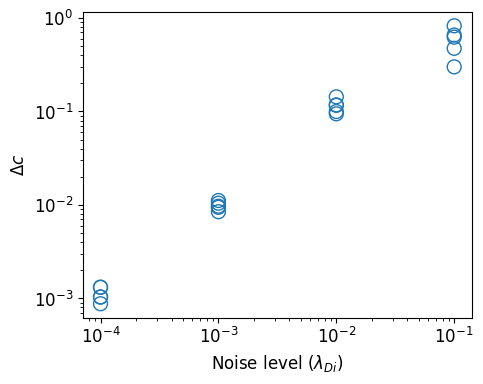

In [25]:
plt.rcParams["figure.figsize"] = (5,4)
plot_noise_scan(truest_coefs, noises)

In [21]:
directory_name = 'paper_results/weak_noise_robustness/noise_scan2/'
list_of_data_scan_2 = []
file_names = [
    'noises.pickle',
    'thresholds.pickle',
    'truest_coefs.pickle',
    'truest_prediction_errors.pickle'
]
for file_name in file_names:
    data_from_scan_2 = ys.unpickle_data(directory_name, file_name)
    list_of_data_scan_2.append(data_from_scan_2)

In [22]:
# unpack to readable variables
noises2 = list_of_data_scan_2[0]
thresholds2 = list_of_data_scan_2[1]
truest_coefs2 = list_of_data_scan_2[2]
truest_scores2 = list_of_data_scan_2[3]

(<Figure size 500x400 with 1 Axes>,
 <Axes: xlabel='Noise level ($\\lambda_{Di}$)', ylabel='$\\Delta c$'>)

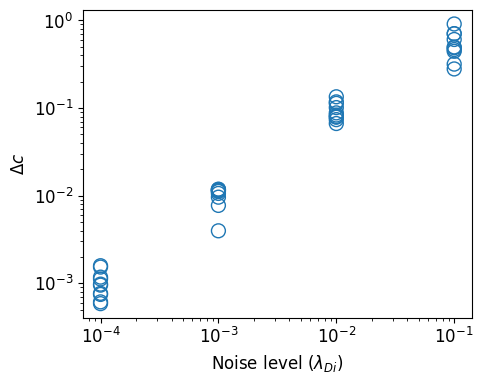

In [26]:
plt.rcParams["figure.figsize"] = (5,4)
plot_noise_scan(truest_coefs2, noises2)

In [377]:
for coefs in truest_coefs2:
    complexity = np.count_nonzero(coefs)
    print(complexity)

4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
3
4
4
4
4
4
